Model Training
1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [83]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
#from sklearn.linear_model import LinearRegression, Ridge,Lasso
#from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings

In [84]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [85]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Import the CSV Data as Pandas DataFrame

In [102]:
df=pd.read_csv('data/improved_disease_dataset.csv')

Show Top 5 Records

In [89]:
df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


Preparing X and Y variables

In [128]:
from sklearn.preprocessing import LabelEncoder


X = df.drop(columns=['disease'],axis=1)
y=df['disease']

le=LabelEncoder()
y=le.fit_transform(y)

In [105]:
df.columns

Index(['fever', 'headache', 'nausea', 'vomiting', 'fatigue', 'joint_pain',
       'skin_rash', 'cough', 'weight_loss', 'yellow_eyes', 'disease'],
      dtype='object')

In [106]:
print("Categories in 'fever' variable:     ",end=" " )
print(df['fever'].unique())

print("Categories in 'headache' variable:  ",end=" ")
print(df['headache'].unique())

print("Categories in'nausea' variable:   ",end=" " )
print(df['nausea'].unique())

print("Categories in 'vomiting' variable:     ",end=" " )
print(df['vomiting'].unique())

print("Categories in 'fatigue' variable:     ",end=" " )
print(df['fatigue'].unique())

print("Categories in 'joint_pain' variable:     ",end=" " )
print(df['joint_pain'].unique())

print("Categories in 'skin_rash' variable:  ",end=" ")
print(df['skin_rash'].unique())

print("Categories in'cough' variable:   ",end=" " )
print(df['cough'].unique())

print("Categories in 'weight_loss' variable:     ",end=" " )
print(df['weight_loss'].unique())

print("Categories in 'yellow_eyes' variable:     ",end=" " )
print(df['yellow_eyes'].unique())

print("Categories in 'disease' variable:     ",end=" " )
print(df['disease'].unique())

Categories in 'fever' variable:      [1 0]
Categories in 'headache' variable:   [0 1]
Categories in'nausea' variable:    [1 0]
Categories in 'vomiting' variable:      [0 1]
Categories in 'fatigue' variable:      [1 0]
Categories in 'joint_pain' variable:      [0 1]
Categories in 'skin_rash' variable:   [0 1]
Categories in'cough' variable:    [1 0]
Categories in 'weight_loss' variable:      [1 0]
Categories in 'yellow_eyes' variable:      [0 1]
Categories in 'disease' variable:      ['Paralysis (brain hemorrhage)' 'Hypertension' 'Hepatitis B' 'Impetigo'
 'Chronic cholestasis' 'Hepatitis C' 'Typhoid'
 'Dimorphic hemorrhoids(piles)'
 'Vertigo (Benign paroxysmal Positional Vertigo)' 'Cervical spondylosis'
 'Tuberculosis' 'Hyperthyroidism' 'Malaria' 'Gastroenteritis'
 'Osteoarthritis' 'Heart attack' 'Dengue' 'Pneumonia'
 'Urinary tract infection' 'Hypoglycemia' 'Bronchial Asthma' 'Arthritis'
 'Hepatitis D' 'Hypothyroidism' 'Acne' 'GERD' 'Peptic ulcer disease'
 'Psoriasis' 'Drug Reaction' 'D

# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

X = preprocessor.fit_transform(X)

type(X)

In [9]:

X.shape

(2000, 10)

In [109]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((1600, 10), (400, 10))

Create an Evaluate Function to give all metrics after model Training

In [110]:
def evaluate_model(true, predicted):
    acc = accuracy_score(true, predicted)
    return acc

In [14]:
models = {
    "K-Neighbors classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest classifier": RandomForestClassifier(),
    "XGBclassifier": XGBClassifier(), 
    "CatBoosting classifier": CatBoostClassifier(verbose=False),
    "AdaBoost classifier": AdaBoostClassifier()
}
model_list = []
tr_acc =[]
te_acc=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_acc = evaluate_model(y_train, y_train_pred)

    model_test_acc = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy score for train data: {:.4f}".format(model_train_acc))
  
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy score for train data: {:.4f}".format(model_test_acc))

    tr_acc.append(model_train_acc)
    te_acc.append(model_test_acc)
    
    print('='*35)
    print('\n')

K-Neighbors classifier
Model performance for Training set
- Accuracy score for train data: 0.4831
----------------------------------
Model performance for Test set
- Accuracy score for train data: 0.3300


Decision Tree
Model performance for Training set
- Accuracy score for train data: 0.6531
----------------------------------
Model performance for Test set
- Accuracy score for train data: 0.3200


Random Forest classifier
Model performance for Training set
- Accuracy score for train data: 0.6531
----------------------------------
Model performance for Test set
- Accuracy score for train data: 0.3575


XGBclassifier
Model performance for Training set
- Accuracy score for train data: 0.6531
----------------------------------
Model performance for Test set
- Accuracy score for train data: 0.3700


CatBoosting classifier
Model performance for Training set
- Accuracy score for train data: 0.6531
----------------------------------
Model performance for Test set
- Accuracy score for train d

In [15]:
pd.DataFrame(list(zip(model_list,tr_acc,te_acc)), columns=['Model Name','TR_ACC','TE_ACC']).sort_values(by=["TE_ACC"],ascending=False)

,Model Name,TR_ACC,TE_ACC
3,XGBclassifier,0.653125,0.3700
2,Random Forest classifier,0.653125,0.3575
4,CatBoosting classifier,0.653125,0.3500
0,K-Neighbors classifier,0.483125,0.3300
1,Decision Tree,0.653125,0.3200
5,AdaBoost classifier,0.132500,0.1425


In the above case ..there is huge difference between the training accuracy and testing accuracy which means that there is long gap in sampling of data (see below)

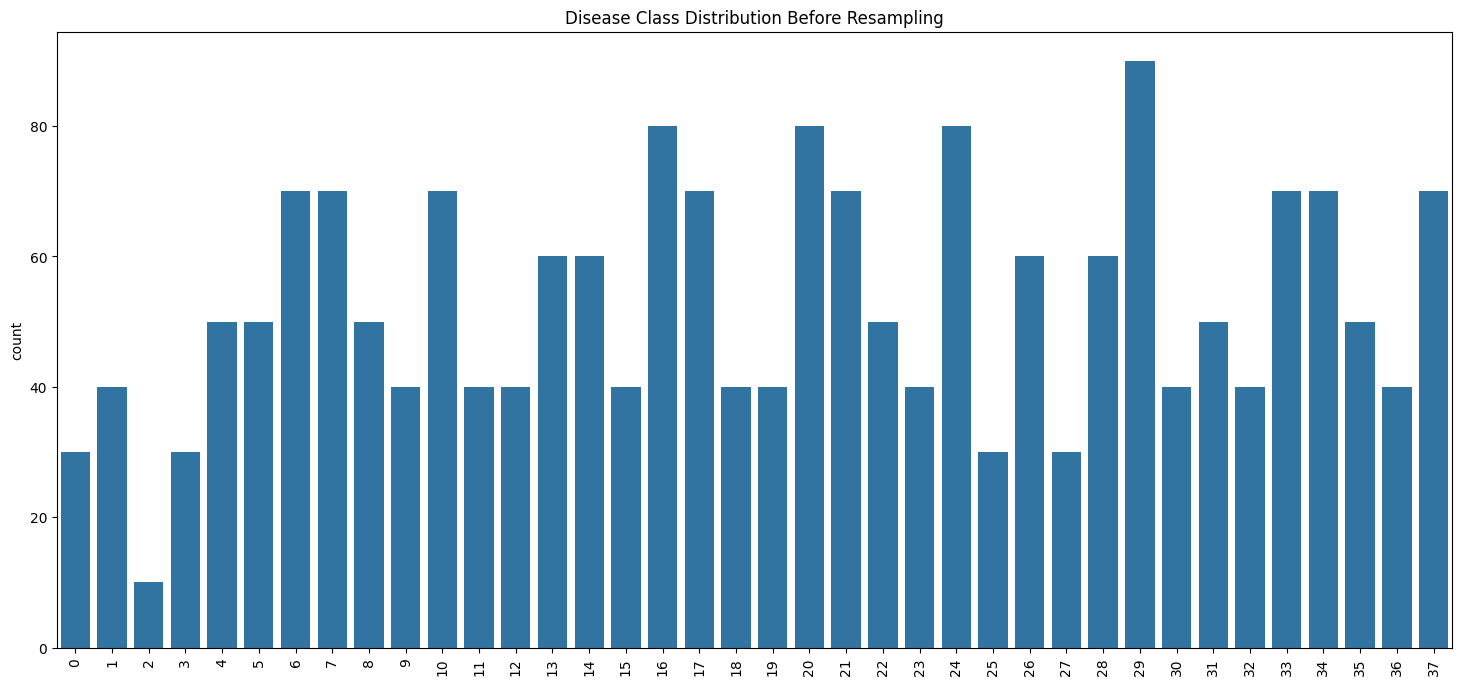

In [16]:
plt.figure(figsize=(18, 8))
sns.countplot(x=y)
plt.title("Disease Class Distribution Before Resampling")
plt.xticks(rotation=90)
plt.show()

 visualize class distribution to check for imbalance. We then use RandomOverSampler to balance the dataset by duplicating minority classes and ensuring all diseases have equal samples for fair and effective model training.

In [30]:
pip install imblearn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.1 MB 18.2 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.1 MB 18.1 MB/s eta 0:00:01
   -------------------------------------- - 10.7/11.1 MB 17.7 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 17.4 MB/s eta 0:00:00

  Attempting uninstall: scikit-learn

    Found existing installation: scikit-learn 1.7.1

    Uninstalling scikit-learn-1.7.1:

      Successfully uninstalled scikit-learn-1.7.1

   ---------------------------------------- 0/4 [scikit-learn]
   ---------------------------------------- 0/4 [scikit-learn]
   ---------------------------------------- 0/4 [scikit-learn]
   ---------------------------------------- 0/4 [scikit-learn]
   ---------------------------------------- 0/4 [scikit-learn]
   ---------------------------------------- 0/4 [scikit-learn]
   ---------------------------------------- 0/4 [scikit-l

  You can safely remove it manually.


In [129]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Resampled Class Distribution:\n", pd.Series(y_resampled).value_counts())

Resampled Class Distribution:
 29    90
20    90
16    90
24    90
7     90
17    90
34    90
10    90
37    90
6     90
33    90
21    90
26    90
13    90
28    90
14    90
8     90
31    90
35    90
22    90
5     90
4     90
18    90
23    90
1     90
12    90
30    90
32    90
11    90
9     90
36    90
15    90
19    90
27    90
3     90
25    90
0     90
2     90
Name: count, dtype: int64


In [130]:
from sklearn.model_selection import StratifiedKFold,cross_val_score
#X_resampled = X_resampled.fillna(0)
X_resampled = np.nan_to_num(X_resampled, nan=0)

if len(y_resampled.shape) > 1:
    y_resampled = y_resampled.values.ravel()

models = {
    "K-Neighbors classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest classifier": RandomForestClassifier(),
    "XGBclassifier": XGBClassifier(), 
    "CatBoosting classifier": CatBoostClassifier(verbose=False),
    "AdaBoost classifier": AdaBoostClassifier()
}

cv_scoring = 'accuracy'  # you can also use 'f1_weighted', 'roc_auc_ovr' for multi-class
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    try:
        scores = cross_val_score(
            model,
            X_resampled,
            y_resampled,
            cv=stratified_kfold,
            scoring=cv_scoring,
            n_jobs=-1,
            error_score='raise' 
        )
        print("=" * 50)
        print(f"Model: {model_name}")
        print(f"Scores: {scores}")
        print(f"Mean Accuracy: {scores.mean():.4f}")
    except Exception as e:
        print("=" * 50)
        print(f"Model: {model_name} failed with error:")
        print(e)


Model: K-Neighbors classifier
Scores: [0.5        0.48538012 0.46052632 0.45906433 0.4751462 ]
Mean Accuracy: 0.4760
Model: Decision Tree
Scores: [0.5497076  0.54385965 0.53216374 0.53654971 0.52631579]
Mean Accuracy: 0.5377
Model: Random Forest classifier
Scores: [0.5497076  0.54239766 0.54093567 0.53508772 0.52923977]
Mean Accuracy: 0.5395
Model: XGBclassifier
Scores: [0.55116959 0.55409357 0.53216374 0.53947368 0.53654971]
Mean Accuracy: 0.5427
Model: CatBoosting classifier
Scores: [0.5628655  0.54385965 0.53947368 0.53947368 0.53654971]
Mean Accuracy: 0.5444
Model: AdaBoost classifier
Scores: [0.10380117 0.12426901 0.09795322 0.11403509 0.08040936]
Mean Accuracy: 0.1041


In [131]:
from sklearn.model_selection import train_test_split
X_samp_train, X_samp_test, y_samp_train, y_samp_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)
X_samp_train.shape, X_samp_test.shape

((2736, 10), (684, 10))

In [114]:
models = {
    "K-Neighbors classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest classifier": RandomForestClassifier(),
    "XGBclassifier": XGBClassifier(), 
    "CatBoosting classifier": CatBoostClassifier(verbose=False),
    "AdaBoost classifier": AdaBoostClassifier()
}
model_list = []
tr_acc =[]
te_acc=[]
l=[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_samp_train, y_samp_train) # Train model

    # Make predictions
    y_samp_train_pred = model.predict(X_samp_train)
    y_samp_test_pred = model.predict(X_samp_test)
    l.append(y_samp_test_pred)
    # Evaluate Train and Test dataset
    model_samp_train_acc = evaluate_model(y_samp_train, y_samp_train_pred)

    model_samp_test_acc = evaluate_model(y_samp_test, y_samp_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy score for train data: {:.4f}".format(model_samp_train_acc))
  
    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy score for train data: {:.4f}".format(model_samp_test_acc))

    tr_acc.append(model_samp_train_acc)
    te_acc.append(model_samp_test_acc)
    
    print('='*35)
    print('\n')
print(l)

K-Neighbors classifier
Model performance for Training set
- Accuracy score for train data: 0.6217
----------------------------------
Model performance for Test set
- Accuracy score for train data: 0.4664


Decision Tree
Model performance for Training set
- Accuracy score for train data: 0.7065
----------------------------------
Model performance for Test set
- Accuracy score for train data: 0.5219


Random Forest classifier
Model performance for Training set
- Accuracy score for train data: 0.7065
----------------------------------
Model performance for Test set
- Accuracy score for train data: 0.5307


XGBclassifier
Model performance for Training set
- Accuracy score for train data: 0.7061
----------------------------------
Model performance for Test set
- Accuracy score for train data: 0.5395


CatBoosting classifier
Model performance for Training set
- Accuracy score for train data: 0.7065
----------------------------------
Model performance for Test set
- Accuracy score for train d

In [116]:
pd.DataFrame(list(zip(model_list,tr_acc,te_acc)), columns=['Model Name','TR_ACC','TE_ACC']).sort_values(by=["TE_ACC"],ascending=False)

,Model Name,TR_ACC,TE_ACC
3,XGBclassifier,0.706140,0.539474
4,CatBoosting classifier,0.706506,0.533626
2,Random Forest classifier,0.706506,0.530702
1,Decision Tree,0.706506,0.521930
0,K-Neighbors classifier,0.621711,0.466374
5,AdaBoost classifier,0.106360,0.093567


so for balanced dataset the training and testing accuracy have been increased.....

Combining Predictions for Robustness

In [117]:
from statistics import mode

final_preds = [mode([i.item(), j.item(), k.item(), m.item(), n.item(), o.item()])  for i, j, k, m, n, o in zip(*l)]

print(f"Combined Model Accuracy: {accuracy_score(y_samp_test, final_preds) * 100:.2f}%")

Combined Model Accuracy: 53.22%


✅ Working Version:
If l is a list of 6 arrays (each same length) and each element is an int:

from statistics import mode

final_preds = [mode([i, j, k, m, n, o]) for i, j, k, m, n, o in zip(*l)]
print(final_preds)

got hashtype error so tried this  :


You need to extract scalar values:

final_preds = [mode([i.item(), j.item(), k.item(), m.item(), n.item(), o.item()]) 
               for i, j, k, m, n, o in zip(*l)]

Train each model individually and build the Robust model by combining them 

In [135]:
knn = KNeighborsClassifier()
knn_model=knn.fit(X_samp_train, y_samp_train)
knn_preds = knn_model.predict(X_samp_test)

dt = DecisionTreeClassifier()
dt_model=dt.fit(X_samp_train, y_samp_train)
dt_preds = dt_model.predict(X_samp_test)

rf = RandomForestClassifier()
rf_model=rf.fit(X_samp_train, y_samp_train)
rf_preds = rf_model.predict(X_samp_test)


from statistics import mode

final_preds = [mode([i, j, k]) for i, j, k in zip(knn_preds, dt_preds, rf_preds)]

print(f"Combined Model Accuracy: {accuracy_score(y_samp_test, final_preds) * 100:.2f}%")

Combined Model Accuracy: 53.07%


Test the model giving some input value

In [137]:
symptoms = X.columns.values
symptom_index = {symptom: idx for idx, symptom in enumerate(symptoms)}

def predict_disease(input_symptoms):
    input_symptoms = input_symptoms.split(",")
    input_data = [0] * len(symptom_index)
    
    for symptom in input_symptoms:
        if symptom in symptom_index:
            input_data[symptom_index[symptom]] = 1
    
    input_data = np.array(input_data).reshape(1, -1)

    rf_pred = le.classes_[rf_model.predict(input_data)[0]]
    knn_pred = le.classes_[knn_model.predict(input_data)[0]]
    dt_pred = le.classes_[dt_model.predict(input_data)[0]]

    final_pred = mode([rf_pred, knn_pred, dt_pred])
    
    return {
        "Random Forest Prediction": rf_pred,
        "knn Prediction": knn_pred,
        "dt Prediction": dt_pred,
        "Final Prediction": final_pred
    }


# Test
print(predict_disease("fever,headache,yellow_eyes"))

{'Random Forest Prediction': 'Hypoglycemia', 'knn Prediction': 'Hypoglycemia', 'dt Prediction': 'Hypoglycemia', 'Final Prediction': 'Hypoglycemia'}
